## General Imports

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Data, Split Train-Val, and Train Model

For the purpose of this examples we'll use the simple iris dataset and train a random forest model for multiclass classification

In [2]:
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_val = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [3]:
rf_clf = RandomForestClassifier(random_state = 5) # constant random state for the sake of 
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define MLChecks Dataset

In [4]:
from mlchecks import Dataset

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. index, date).

In [5]:
# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred

ds_train = Dataset(df_train, cat_features=[], label = label_col)
ds_val =  Dataset(df_val, cat_features=[], label = label_col)

## Run Data Integrity Check Suite

In [6]:
from mlchecks.suites import IntegrityCheckSuite

In [7]:
IntegrityCheckSuite.run(train_dataset=ds_train, validation_dataset=ds_val, check_datasets_policy='both')

Integrity Suite

Single Dataset Integrity Suite

Single Value in Column - Train Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Single Value in Column - Validation Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Mixed Nulls - Train Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Nulls - Validation Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Types - Train Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

Mixed Types - Validation Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

String Mismatch - Train Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

String Mismatch - Validation Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

Data Duplicates - Train Dataset

Search for duplicate data in dataset.

✓ Nothing found

Data Duplicates - Validation Dataset

Search for duplicate data in dataset.

✓ Nothing found

Special Characters - Train Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

Special Characters - Validation Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

Comparative Integrity Suite

String Mismatch Comparison

Detect different variants of string categories between the same categorical column in two datasets.

✓ Nothing found

Category Mismatch Train Validation

Find new categories in validation.

✓ Nothing found

Great! We're all good.

See what would've happened with a different train-val split:

In [15]:
help(NaiveModelComparison)

Help on class NaiveModelComparison in module mlchecks.checks.performance.naive_model_comparison:

class NaiveModelComparison(mlchecks.base.check.TrainValidationBaseCheck)
 |  NaiveModelComparison(naive_model_type: str = 'statistical', metric=None, metric_name=None)
 |  
 |  Compare naive model score to given model score.
 |  
 |  Method resolution order:
 |      NaiveModelComparison
 |      mlchecks.base.check.TrainValidationBaseCheck
 |      mlchecks.base.check.BaseCheck
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, naive_model_type: str = 'statistical', metric=None, metric_name=None)
 |      Initialize the NaiveModelComparison check.
 |      
 |      Args:
 |          naive_model_type (str = 'random'):  Type of the naive model ['random', 'statistical'].
 |          metric: a custom metric given by user.
 |          metric_name: name of a default metric.
 |  
 |  run(self, train_dataset, validation_dataset, model) -> mlchecks.base.check.CheckResult
 | 

In [8]:
train_len = round(0.67*iris_df.shape[0])
alternative_train_df = iris_df[:train_len]
alternative_val_df = iris_df[train_len:]

In [9]:
IntegrityCheckSuite.run(train_dataset=alternative_train_df, validation_dataset=alternative_val_df,
                        check_datasets_policy='both')

Integrity Suite

Single Dataset Integrity Suite

Single Value in Column - Train Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Single Value in Column - Validation Dataset

Check if there are columns which have only a single unique value in all rows.

The following columns have only one unique value

,target
Single unique value,2


Mixed Nulls - Train Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Nulls - Validation Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Types - Train Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

Mixed Types - Validation Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

String Mismatch - Train Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

String Mismatch - Validation Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

Data Duplicates - Train Dataset

Search for duplicate data in dataset.

✓ Nothing found

Data Duplicates - Validation Dataset

Search for duplicate data in dataset.

2.00% of data samples are duplicates

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Number of Duplicates,,,,,
2,5.800000,2.700000,5.100000,1.900000,2


Special Characters - Train Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

Special Characters - Validation Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

Comparative Integrity Suite

String Mismatch Comparison

Detect different variants of string categories between the same categorical column in two datasets.

✓ Nothing found

Category Mismatch Train Validation

Find new categories in validation.

,Percent of new categories in sample,New categories
Column,,
sepal length (cm),24.00%,"[7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]"
petal length (cm),68.00%,"[5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.3, 6.4, 6.6, 6.7, 6.9]"
petal width (cm),68.00%,"[1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]"
target,100%,[2]


Note that we found:
1. Validation Dataset 'target' column, which is the label column, had only one single unique value! This indicates something that's worth noticing (validation data is different than the training data and has only a single type of labels in samples...)
2. Validation dataset had a duplicate sample (which might be fine, use-case dependent). If not relevant, this check can be removed from suite.
3. New category detected in validation dataset. Since not explicitly stated, these categories were inferred as categorical due to a limited amount of unique values in training dataset. Thus detecting values that were present only in validation dataset.

## Create Custom CheckSuite

In [10]:
from mlchecks import CheckSuite
from mlchecks.checks import *

In [11]:
# for checking out which builtin performance checks exist
import mlchecks
print([class_name for class_name in dir(mlchecks.checks.performance) if class_name[0].isupper()])

['CalibrationMetric', 'ConfusionMatrixReport', 'NaiveModelComparison', 'PerformanceReport', 'RocReport']


In [12]:
MyModelSuite = CheckSuite('Simple Suite For Model Performance',
    ModelInfo(),
    PerformanceReport(),
    TrainValidationDifferenceOverfit(),
    ConfusionMatrixReport(),
    NaiveModelComparison(naive_model_type='random'),
)

Simple Suite For Model Performance

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

,parameter,value
0,bootstrap,True
1,ccp_alpha,0.000000
2,class_weight,None
3,criterion,gini
4,max_depth,None
5,max_features,auto
6,max_leaf_nodes,None
7,max_samples,None
8,min_impurity_decrease,0.000000
9,min_impurity_split,None


Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision - Macro Average,1.000000
Recall - Macro Average,1.000000


Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.000000
Precision - Macro Average,1.000000
Recall - Macro Average,1.000000


Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

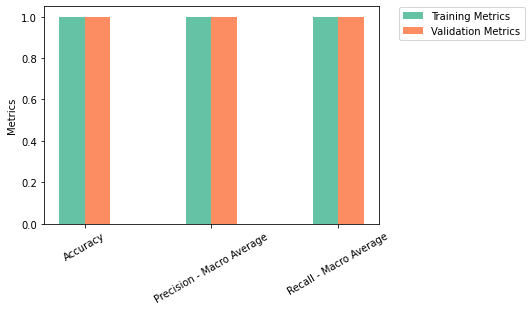

Confusion Matrix Report - Train Dataset

Return the confusion_matrix.

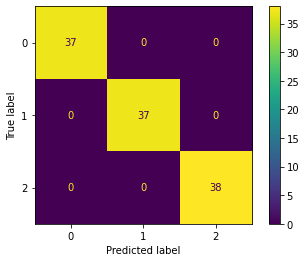

Confusion Matrix Report - Validation Dataset

Return the confusion_matrix.

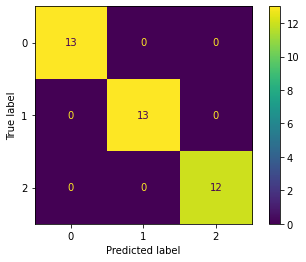

Naive Model Comparison

Compare naive model score to given model score.

RandomForestClassifier Model prediction has achieved 1.0 in Accuracy compared to Naive random prediction which achived 0.34210526315789475 on tested data.

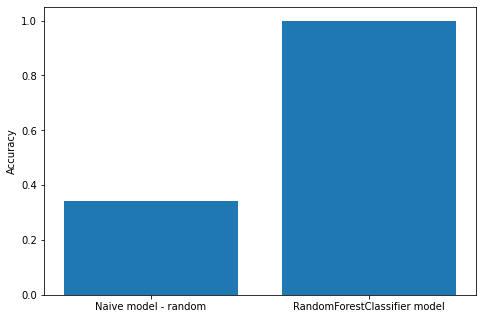

In [13]:
MyModelSuite.run(model=rf_clf, train_dataset=ds_train, validation_dataset=ds_val, check_datasets_policy='both')